In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lecture of the data correspondig to may-2022

In [6]:
# Specify the directory where the file is located
directory = "../data/raw"

# Find the file with the specific name pattern
filename = next(f for f in os.listdir(directory) if f.startswith("yellow_tripdata_2022-05"))

# Construct the full file path
file_path = os.path.join(directory, filename)

# Read the file using pandas
df_may = pd.read_parquet(file_path)

# 2. Basic analysis of the dataframe

In [7]:
print('The shape of the dataframe is', df_may.shape)
print('The name of the columns of the dataframe are', df_may.columns)

The shape of the dataframe is (3588295, 19)
The name of the columns of the dataframe are Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [8]:
#Resume of the data from each column of the dataframe
df_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588295 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [9]:
#Quick review of the dataframe
df_may.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.00,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.00,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.00,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.00,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5,0.0
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,1.87,1.0,N,249,164,1,9.5,0.5,0.5,2.66,0.00,0.3,15.96,2.5,0.0
6,2,2022-05-01 00:07:11,2022-05-01 00:19:24,1.0,3.35,1.0,N,164,112,1,12.5,0.5,0.5,3.43,6.55,0.3,26.28,2.5,0.0
7,2,2022-05-01 00:14:38,2022-05-01 00:33:09,2.0,2.58,1.0,N,79,68,1,13.0,0.5,0.5,3.36,0.00,0.3,20.16,2.5,0.0
8,2,2022-05-01 00:36:36,2022-05-01 01:07:08,1.0,4.55,1.0,N,68,87,1,20.5,0.5,0.5,4.86,0.00,0.3,29.16,2.5,0.0
9,1,2022-05-01 00:17:43,2022-05-01 00:30:32,0.0,2.70,1.0,N,48,145,1,11.5,3.0,0.5,2.00,0.00,0.3,17.30,2.5,0.0


# 3. Processing the data

In order to manage the duration of each trip, we must calculate the difference between the drop off and pick up dates. We add a new column to the dataframe, called 'diff_time' for this purpose

In [10]:
df_may['diff_time'] = df_may['tpep_dropoff_datetime'] - df_may['tpep_pickup_datetime']

It can be shown that there exist negative diferrences of time. This fact tell us that the time of picking up the passenger is larger than the dropping out time. The following cell reports that, in fact, there exist a little percent of this kind of trips inside the dataframe

In [11]:
n = (df_may['diff_time'].dt.total_seconds()<0).sum()

negative_time_trips_percentage = n/df_may.shape[0]

print(f'The percentage of trips with negative time is {negative_time_trips_percentage*100}%')

print(f'The percentage of trips with valid times is {(1-negative_time_trips_percentage)*100}')

The percentage of trips with negative time is 0.03533711693157893%
The percentage of trips with valid times is 99.96466288306843


Because it is not seems logical that a trip starts after the drop out date reported, we drop all those entries that reports negative differences of time between the drop off and pick up dates. 

In [12]:
df_may = df_may.drop(df_may[df_may['diff_time'].dt.total_seconds() < 0].index)

Now, in the dataframe we notice that there exists trips with durations of several days (2, 3, even 4 days). The following dataframe called 'day_ranges' show us the rides that reports this anomalies

In [13]:
day_ranges = pd.DataFrame()

# Ranges of days for a trip, between 0 to 1, 1 to 2, etc
day_ranges['ranges'] = [f'{i}-{i+1}' for i in range(0, 4, 1)]

day_ranges['total_rides'] = df_may['diff_time'].dt.days.value_counts().sort_index().values
s = day_ranges['total_rides'].sum()
day_ranges['percent'] = (day_ranges['total_rides'] / s)*100
day_ranges

,ranges,total_rides,percent
0,0-1,3587008,99.999470
1,1-2,15,0.000418
2,2-3,2,0.000056
3,3-4,2,0.000056


The number of trips that take 2, 3 or 4 days are less than the $0.001 \%$. Therefore, we consider that those trips are outliers from our analysis; therefore, we only keep trips with a duration of less than one day.

In [14]:
df_may_less_1_day = df_may[df_may['diff_time'] < pd.Timedelta(days=1)]

df_may_less_1_day.shape

(3587008, 20)

Now, we need to know the duration of each trip. The following cell show us the histogram of the number of trips grouped by the duration of them.

C:\Users\Modemat\AppData\Local\Temp\ipykernel_90832\3093232342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_less_1_day['hours'] = df_may_less_1_day['diff_time'].dt.total_seconds() // 3600


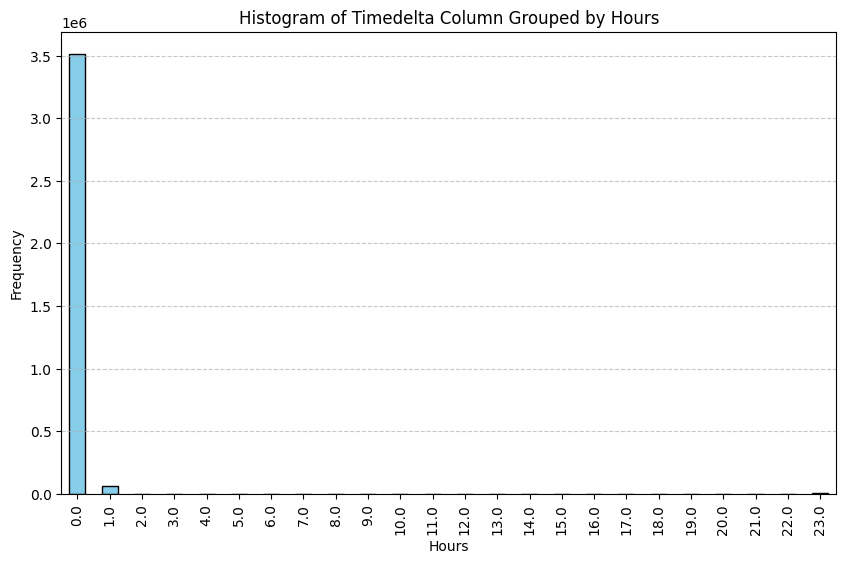

In [15]:
# Extract the total hours from the timedelta column
df_may_less_1_day['hours'] = df_may_less_1_day['diff_time'].dt.total_seconds() // 3600

# Plot the histogram grouped by hours
plt.figure(figsize=(10, 6))
df_may_less_1_day['hours'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Timedelta Column Grouped by Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The following dataframe tell us the percentage of trips per hour, whose duration lies between 0 and 1 hours, 1 and 2 hours, and so on.

In [16]:
hour_ranges = pd.DataFrame()
hour_ranges['ranges'] = [f'{i}-{i+1}' for i in range(0, 24, 1)]
hour_ranges['total_rides'] = df_may_less_1_day['hours'].value_counts().sort_index().values
s = hour_ranges['total_rides'].sum()
hour_ranges['percent'] = (hour_ranges['total_rides'] / s)*100
hour_ranges

,ranges,total_rides,percent
0,0-1,3514475,97.977897
1,1-2,66557,1.855502
2,2-3,911,0.025397
3,3-4,151,0.004210
4,4-5,75,0.002091
5,5-6,56,0.001561
6,6-7,59,0.001645
7,7-8,50,0.001394
8,8-9,43,0.001199
9,9-10,51,0.001422


Since most trips last less than two hours, we dropp all trips with a duration longer thatn two hours

In [17]:
df_may_valid_time = df_may_less_1_day.drop(df_may_less_1_day[df_may_less_1_day['diff_time'].dt.total_seconds() 
                                                              > 3600*2].index)

Next, we drop the missing values. For this purpose, we first count from each column, the nan values

In [18]:
nan_values = pd.DataFrame()
nan_values['values'] = df_may_valid_time.isna().sum()
nan_values['percentage'] = nan_values['values'] / df_may_valid_time.shape[0]*100
nan_values

,values,percentage
VendorID,0,0.000000
tpep_pickup_datetime,0,0.000000
tpep_dropoff_datetime,0,0.000000
passenger_count,128085,3.576759
trip_distance,0,0.000000
RatecodeID,128085,3.576759
store_and_fwd_flag,128085,3.576759
PULocationID,0,0.000000
DOLocationID,0,0.000000
payment_type,0,0.000000


In [19]:
nan_by_row = df_may_valid_time.isna().sum(axis=1)

nan_by_row.value_counts()

0    3452950
5     128085
Name: count, dtype: int64

In [20]:
df_may_cleaned = df_may_valid_time.dropna()

Now, we report the frequency of pick up and drop off days. Although the travels last less than two hours, some trips could start in a day, and end the day after; therefore, some discrepance between the frequencies of the pick up and drop off may differs

C:\Users\Modemat\AppData\Local\Temp\ipykernel_90832\257446035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['day_of_week_pick_up'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()
C:\Users\Modemat\AppData\Local\Temp\ipykernel_90832\257446035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['day_of_week_drop_off'] = df_may_cleaned['tpep_dropoff_datetime'].dt.day_name()


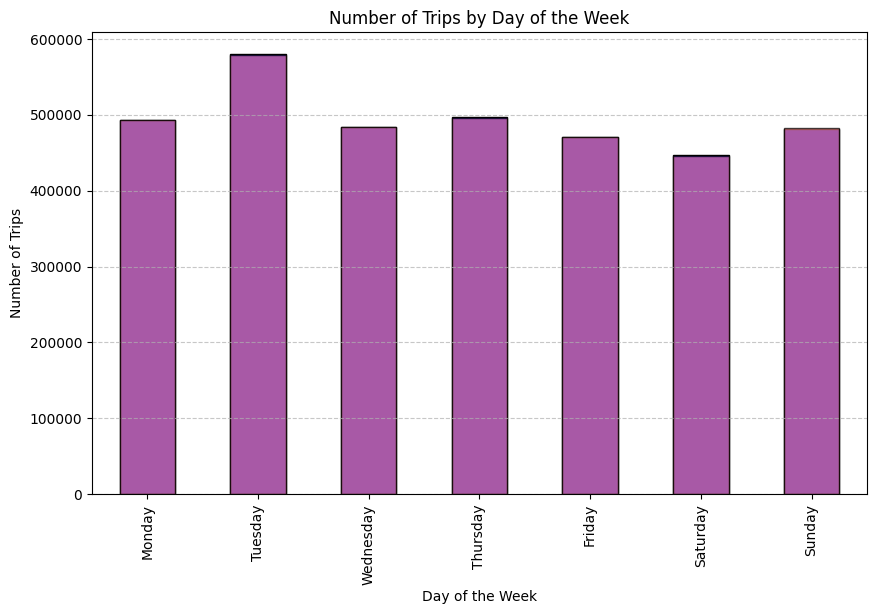

In [21]:
# Extract the day of the week from the datetime column
df_may_cleaned['day_of_week_pick_up'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()
df_may_cleaned['day_of_week_drop_off'] = df_may_cleaned['tpep_dropoff_datetime'].dt.day_name()

# Count the number of trips for each day of the week
trips_per_day_pick_up = df_may_cleaned['day_of_week_pick_up'].value_counts()
trips_per_day_drop_off = df_may_cleaned['day_of_week_drop_off'].value_counts()

# Sort by the natural order of days (optional)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_per_day_pick_up = trips_per_day_pick_up.reindex(day_order)
trips_per_day_drop_off = trips_per_day_drop_off.reindex(day_order)

# Plot the results (optional)

plt.figure(figsize=(10, 6))
trips_per_day_pick_up.plot(kind='bar', color='blue', edgecolor='black', label='Pick-Up')
trips_per_day_drop_off.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7, label='Drop-Off')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The following dataframe reports the total number of trips that begin in a specific day and end the day after.

In [22]:
trips_cross_day = df_may_cleaned[
    df_may_cleaned['tpep_dropoff_datetime'].dt.date > df_may_cleaned['tpep_pickup_datetime'].dt.date
]

# Count the number of such trips
num_cross_day_trips = trips_cross_day.shape[0]

print(f"Number of trips that start in one day and finish the next day: {num_cross_day_trips}")

Number of trips that start in one day and finish the next day: 28525


We to compute day by day the number of trips that begin in a day, and end the day after

C:\Users\Modemat\AppData\Local\Temp\ipykernel_90832\2586316783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_cross_day['pickup_day'] = trips_cross_day['tpep_pickup_datetime'].dt.day_name()


Number of trips that start on one day and finish the next, grouped by pickup day:
pickup_day
Monday       2964
Tuesday      4026
Wednesday    3832
Thursday     4386
Friday       5016
Saturday     5157
Sunday       3144
dtype: int64


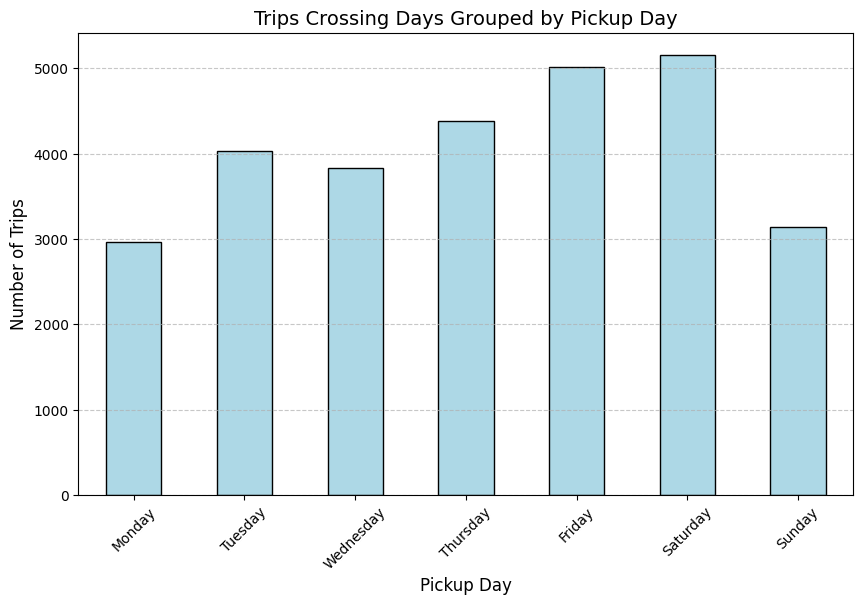

In [23]:
# Filter trips that start on one day and finish the next day
trips_cross_day = df_may_cleaned[
    df_may_cleaned['tpep_dropoff_datetime'].dt.date > df_may_cleaned['tpep_pickup_datetime'].dt.date
]

# Add a new column for the pickup day
trips_cross_day['pickup_day'] = trips_cross_day['tpep_pickup_datetime'].dt.day_name()

# Group by pickup day and count the number of trips
cross_day_report = trips_cross_day.groupby('pickup_day').size()

# Optional: Sort by natural order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cross_day_report = cross_day_report.reindex(day_order).fillna(0).astype(int)

# Print the report
print("Number of trips that start on one day and finish the next, grouped by pickup day:")
print(cross_day_report)


plt.figure(figsize=(10, 6))
cross_day_report.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Trips Crossing Days Grouped by Pickup Day', fontsize=14)
plt.xlabel('Pickup Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Now, we present the number of trips made along all the month, grouped by the pick up hour. It seems that the majority of the trips are made from 12:00 to 21:00 during the month

C:\Users\Modemat\AppData\Local\Temp\ipykernel_90832\1039599109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['pickup_hour'] = df_may_cleaned['tpep_pickup_datetime'].dt.hour


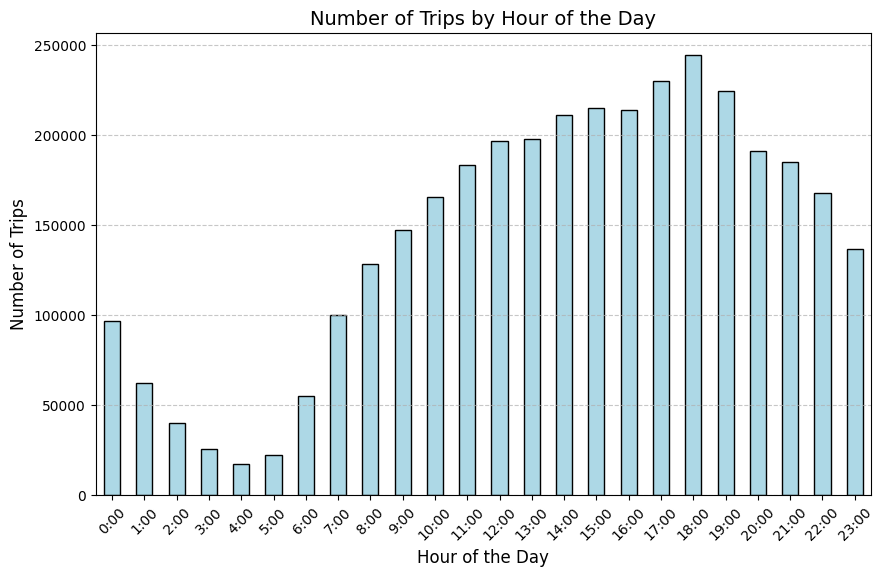

In [24]:
# Extract the hour from the datetime column
df_may_cleaned['pickup_hour'] = df_may_cleaned['tpep_pickup_datetime'].dt.hour

# Count the number of trips for each hour
trips_per_hour = df_may_cleaned['pickup_hour'].value_counts().sort_index()

# Plot of number of trips by hour, for each day of the week 
plt.figure(figsize=(10, 6))
trips_per_hour.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Number of Trips by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The following set of graphics show the total trips made from each day of the month, grouped by the pick up hour

C:\Users\Modemat\AppData\Local\Temp\ipykernel_90832\2551792714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['pickup_day'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()


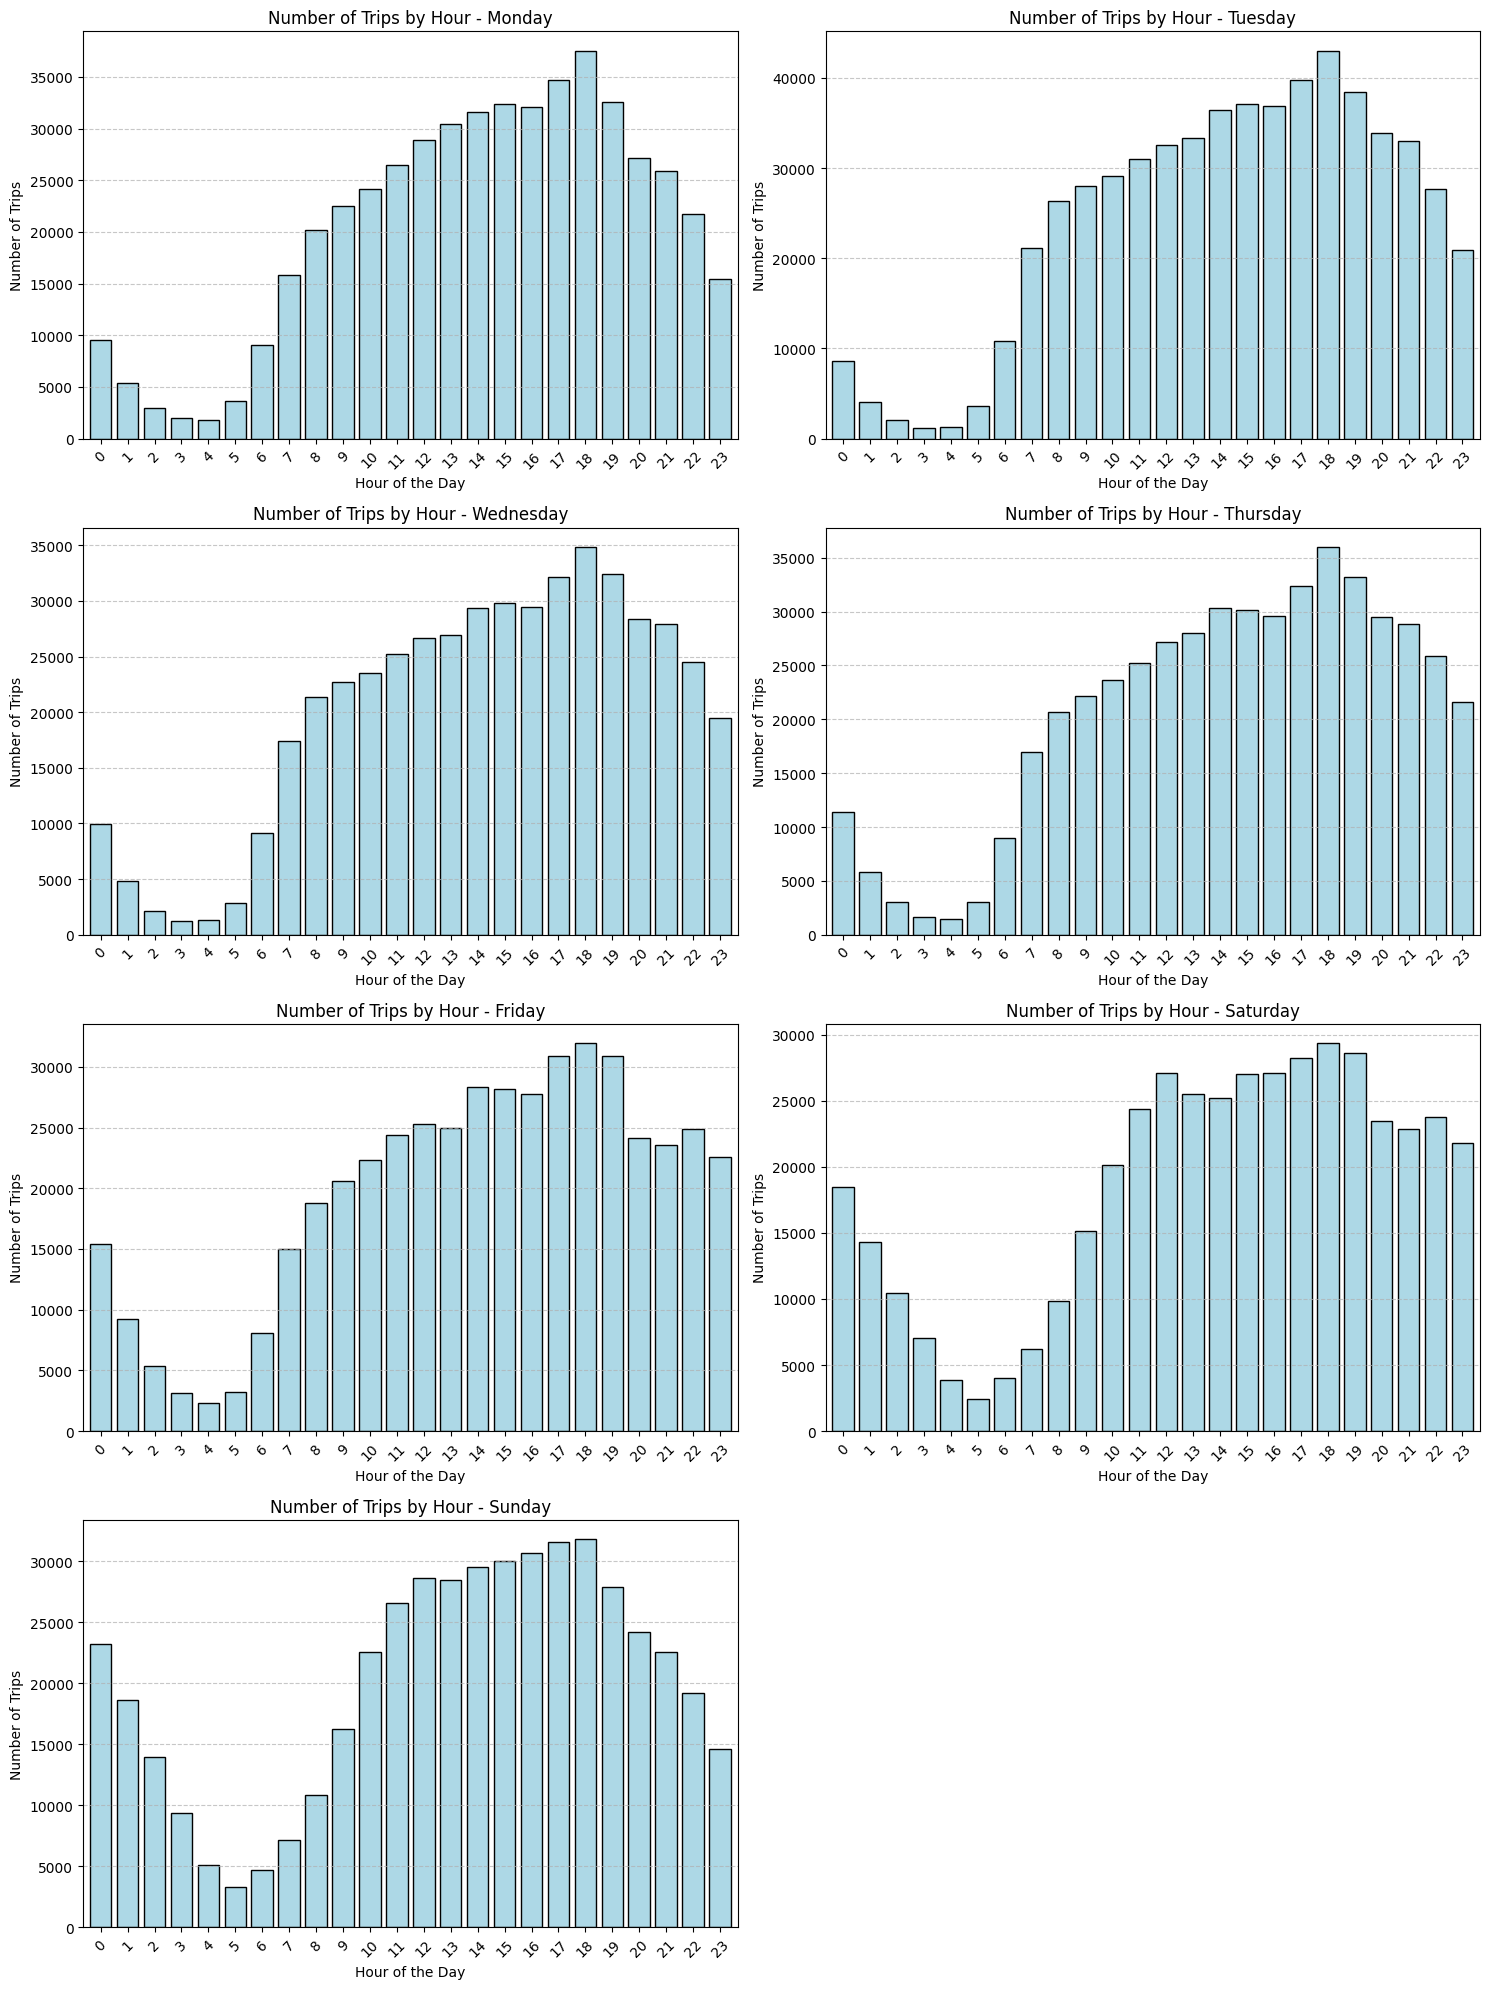

In [25]:
# Extract the day of the week
df_may_cleaned['pickup_day'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()

# Group by day of the week and hour
grouped_data = df_may_cleaned.groupby(['pickup_day', 'pickup_hour']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(day_order)

# Plot 7 separate graphs, one for each day
plt.figure(figsize=(15, 20))
for i, day in enumerate(day_order):
    plt.subplot(4, 2, i + 1)  # Arrange plots in a grid
    grouped_data.loc[day].plot(kind='bar', color='lightblue', edgecolor='black', width=0.8)
    plt.title(f'Number of Trips by Hour - {day}', fontsize=12)
    plt.xlabel('Hour of the Day', fontsize=10)
    plt.ylabel('Number of Trips', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


The following set of graphics shows the sum of the fare amounts at each hour and day of the week. 

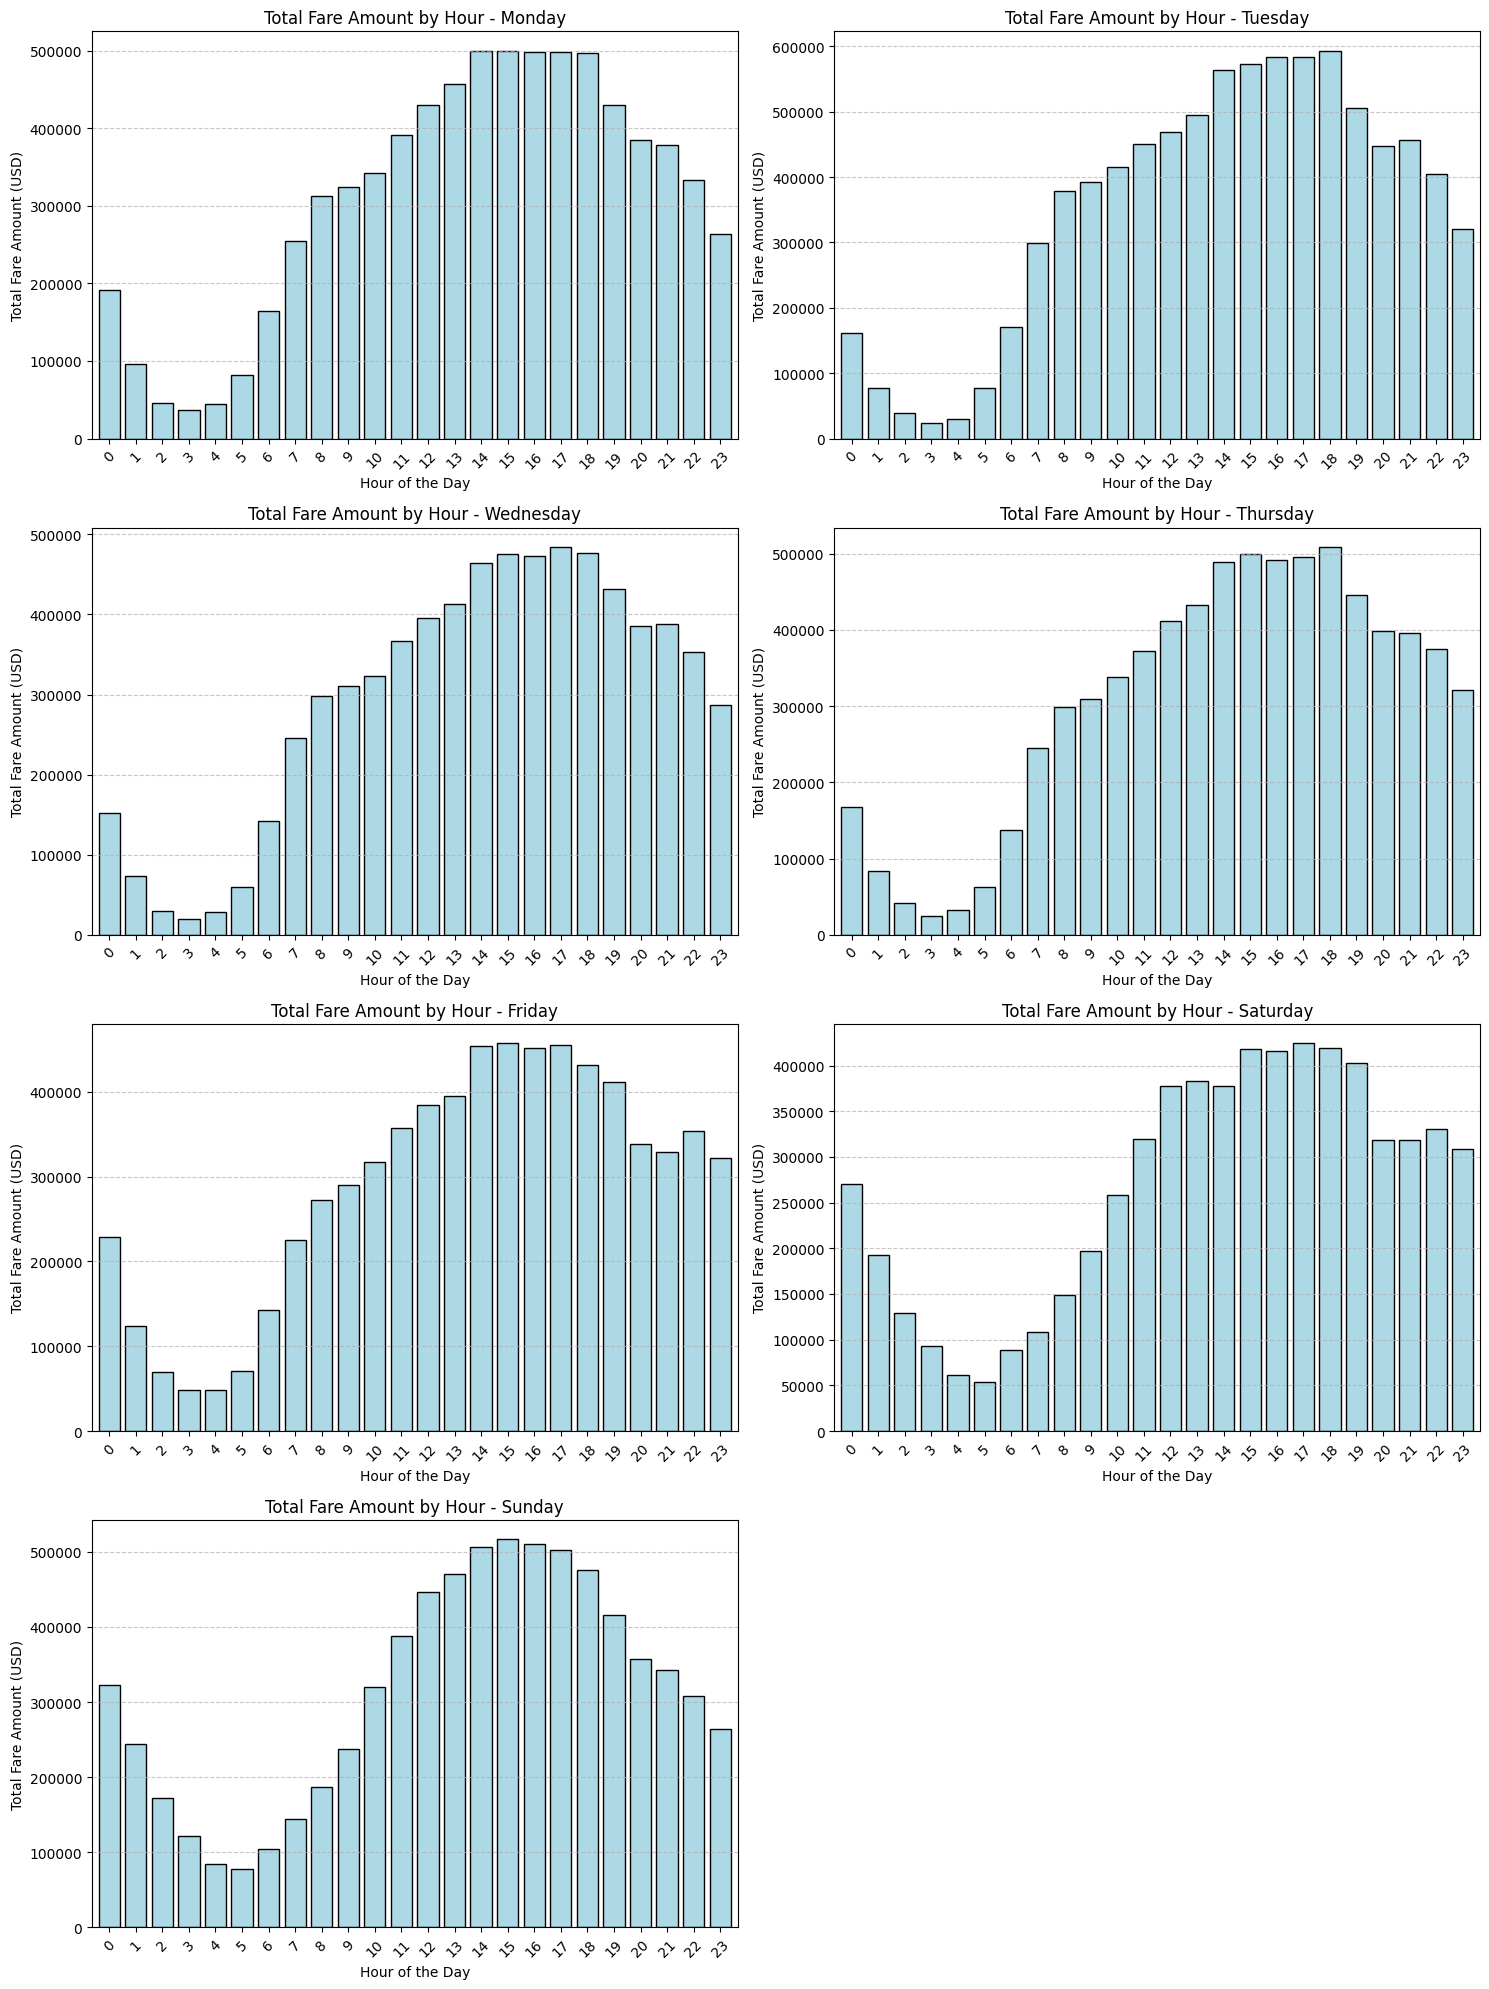

In [26]:
# Group by day and hour, summing up the fare amount
total_fare_by_day_hour = df_may_cleaned.groupby(['pickup_day', 'pickup_hour'])['fare_amount'].sum()

total_fare_by_day_hour = total_fare_by_day_hour.reorder_levels(['pickup_day', 'pickup_hour'])
total_fare_by_day_hour = total_fare_by_day_hour.loc[day_order]

# Plotting: 7 graphs for each day
plt.figure(figsize=(15, 20))
for i, day in enumerate(day_order):
    plt.subplot(4, 2, i + 1)  # Arrange plots in a grid

    # Filter data for the current day
    day_data = total_fare_by_day_hour.loc[day]

    # Plot
    day_data.plot(kind='bar', color='lightblue', edgecolor='black', width=0.8)
    plt.title(f'Total Fare Amount by Hour - {day}', fontsize=12)
    plt.xlabel('Hour of the Day', fontsize=10)
    plt.ylabel('Total Fare Amount (USD)', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


For a global vision of the fare amounts across the month, we present the following histogram, which resumes the total fare amount from each day of the week, for all the month 

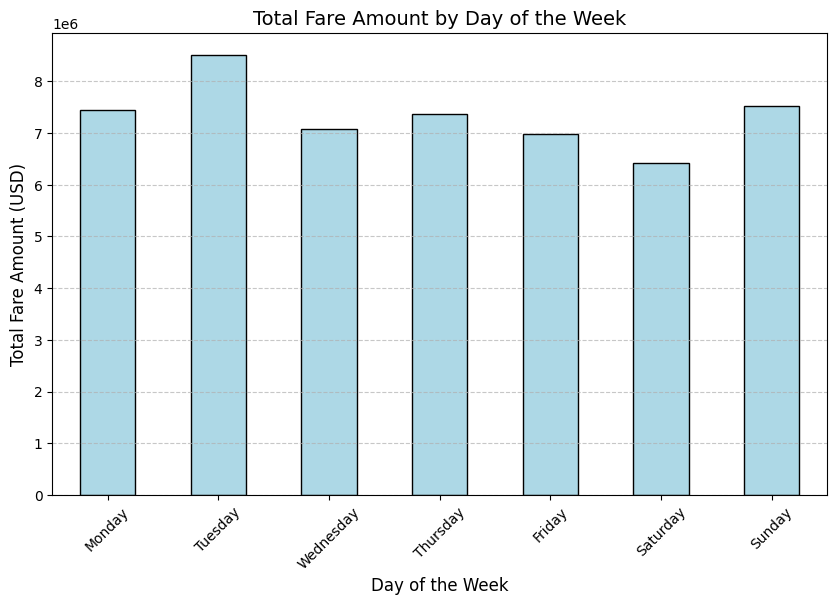

In [28]:
# Extract the total fare amount grouped by day of the week
total_fare_by_day = df_may_cleaned.groupby(['pickup_day'])['fare_amount'].sum()

total_fare_by_day = total_fare_by_day.reindex(day_order)

# Plot of total fare by day
plt.figure(figsize=(10, 6))
total_fare_by_day.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Fare Amount by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Fare Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Finally, we resume the fare amount grouped by hours, for all the month.

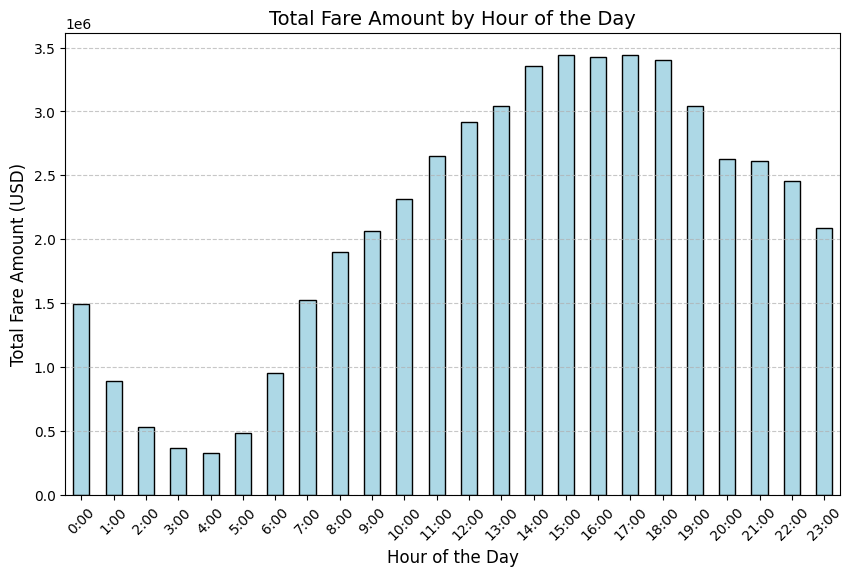

In [30]:
# Group by pickup hour and calculate the total fare amount
total_fare_by_hour = df_may_cleaned.groupby(['pickup_hour'])['fare_amount'].sum()

# Plot of total fare amount by hour
plt.figure(figsize=(10, 6))
total_fare_by_hour.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Fare Amount by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Fare Amount (USD)', fontsize=12)
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
